In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
np.random.seed(123456)

 - https://stackoverflow.com/questions/57888324/how-to-combine-numpy-isclose-function
 - https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randint.html
 - https://seaborn.pydata.org/generated/seaborn.scatterplot.html
 - https://en.wikipedia.org/wiki/Nearest_neighbor_search
 - https://en.wikipedia.org/wiki/K-d_tree
 - https://scikit-learn.org/stable/modules/neighbors.html

In [4]:
N = 100
df1 = pd.DataFrame(np.random.randint(0, 500, size=(N, 2)), columns=['x', 'y'])
df2 = pd.DataFrame(np.random.randint(0, 500, size=(N, 2)), columns=['x', 'y'])

In [5]:
df1.reset_index(inplace=True)
df2.reset_index(inplace=True)

In [6]:
def product(left, right):
    return left.assign(key=1).merge(right.assign(key=1), on='key', suffixes=('_a', '_b')).drop('key', 1)

In [7]:
cross = product(df1, df2)

In [8]:
def dist(df):
    return np.sqrt((df['x_a'] - df['x_b'])**2 + (df['y_a'] - df['y_b'])**2)

In [9]:
cross['distance'] = dist(cross)

In [10]:
cross = cross.loc[cross['distance']<50,:]

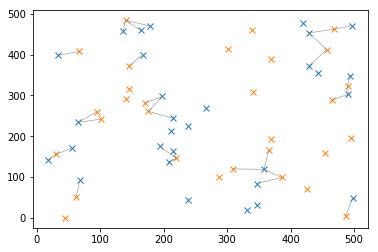

In [11]:
coords = cross.values[:,[1,2,4,5]]
fig, axe = plt.subplots()
axe.plot(df1['x'], df1['y'], 'x')
axe.plot(df2['x'], df2['y'], 'x')
for k in range(coords.shape[0]):
    axe.plot(coords[k,[0,2]], coords[k,[1,3]], linewidth=0.5, color='gray')

In [12]:
pairs = cross.sort_values(['index_a', 'distance']).drop_duplicates('index_a')
print(pairs.sample(5))

     index_a  x_a  y_a  index_b  x_b  y_b   distance
10         0   65  234       10  101  242  36.878178
600       20  497  471        0  468  462  30.364453
404       13  198  298       14  170  281  32.756679
441       14  194  175       21  220  146  38.948684
698       23  167  400        8  145  372  35.608988


In [13]:
coords = pairs.values[:,[1,2,4,5]]

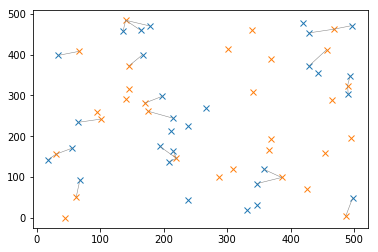

In [14]:
fig, axe = plt.subplots()
axe.plot(df1['x'], df1['y'], 'x')
axe.plot(df2['x'], df2['y'], 'x')
for k in range(coords.shape[0]):
    axe.plot(coords[k,[0,2]], coords[k,[1,3]], linewidth=0.5, color='gray')

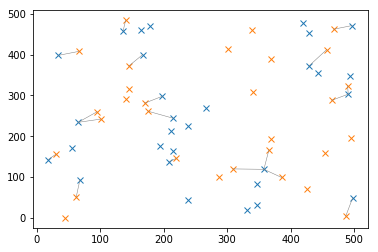

In [15]:
pairs = cross.sort_values(['index_b', 'distance']).drop_duplicates('index_b')
coords = pairs.values[:,[1,2,4,5]]
fig, axe = plt.subplots()
axe.plot(df1['x'], df1['y'], 'x')
axe.plot(df2['x'], df2['y'], 'x')
for k in range(coords.shape[0]):
    axe.plot(coords[k,[0,2]], coords[k,[1,3]], linewidth=0.5, color='gray')